# Libraries

In [1]:
import sys
import os
directory_path = os.path.abspath(os.path.join('..'))
utils_path = os.path.abspath(os.path.join('../utils'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
    sys.path.append(utils_path)

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from utils.Validator import *
from utils.Combinations import *
from utils.Network import *
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Data Consolidation

In [3]:
df_net_metrics = pd.read_csv(r"../data/interim/UserNetworksMetrics.csv")
df_net_metrics["UserId"] = df_net_metrics["UserId"].astype(str)
df_net_metrics.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums
0,368,antgoldbloom,Anthony Goldbloom,2,9Y,983.0,6.0,0.003872,0.001775,4.0,0.000026,5.427340e-23,887.0,0.008758,0.001207
1,381,iguyon,Isabelle,2,9Y,6.0,0.0,0.000024,0.000005,NaN,NaN,NaN,113.0,0.001116,0.000052
2,389,anandjeyahar,Anand Jeyahar,1,9Y,2.0,0.0,0.000008,0.000002,1.0,0.000006,5.427340e-23,59.0,0.000583,0.000033
3,392,jmeynet,Julien Meynet,3,9Y,1.0,0.0,0.000004,0.000002,NaN,NaN,NaN,25.0,0.000247,0.000001
4,394,m4xl1n,m4xl1n,1,9Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_user_achi = pd.read_csv(r"../data/interim/UserAchievements.csv")
df_user_achi["UserId"] = df_user_achi["UserId"].astype(str)
df_user_achi.head()

,UserId,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data
0,368,0.0,0.0,0.0,0.0,3.0,13.0,14.0,13.0,139.0,1.0,3.0,6.0
1,381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0
2,389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,392,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,394,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_user_final = df_net_metrics.merge(df_user_achi,how="left",on=["UserId"])
df_user_final.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data
0,368,antgoldbloom,Anthony Goldbloom,2,9Y,983.0,6.0,0.003872,0.001775,4.0,0.000026,5.427340e-23,887.0,0.008758,0.001207,0.0,0.0,0.0,0.0,3.0,13.0,14.0,13.0,139.0,1.0,3.0,6.0
1,381,iguyon,Isabelle,2,9Y,6.0,0.0,0.000024,0.000005,NaN,NaN,NaN,113.0,0.001116,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0
2,389,anandjeyahar,Anand Jeyahar,1,9Y,2.0,0.0,0.000008,0.000002,1.0,0.000006,5.427340e-23,59.0,0.000583,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,392,jmeynet,Julien Meynet,3,9Y,1.0,0.0,0.000004,0.000002,NaN,NaN,NaN,25.0,0.000247,0.000001,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,394,m4xl1n,m4xl1n,1,9Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Tratamiento de Nulos

In [6]:
df_user_final.isnull().sum()

UserId                           0
UserName                         0
DisplayName                     15
PerformanceTier                  0
Flg_Creacion                   138
in_degree_followers         112354
out_degree_followers        112354
in_degree_cent_followers    112354
pagerank_cent_followers     112354
degree_teams                155035
degree_cent_teams           155035
eigenvector_cent_teams      155035
degree_forums                92863
degree_cent_forums           92863
eigenvector_cent_forums      92863
TotalGold_Comp                   0
TotalSilver_Comp                 0
TotalBronze_Comp                 0
TotalGold_Scri                   0
TotalSilver_Scri                 0
TotalBronze_Scri                 0
TotalGold_Disc                   0
TotalSilver_Disc                 0
TotalBronze_Disc                 0
TotalGold_Data                   0
TotalSilver_Data                 0
TotalBronze_Data                 0
dtype: int64

In [7]:
cols = df_user_final.columns[3:].tolist()
cols.remove('Flg_Creacion')

In [8]:
Validator.validar_categorico(df_user_final,['Flg_Creacion'])

,Variable,n,Missing,%Missing,Unico
0,Flg_Creacion,194147,138,0.07,6


In [9]:
df_user_final[df_user_final['Flg_Creacion'].isnull()].head(10)

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data
172901,7802181,hanashah,Hana Shah,1,NaN,0.0,2.0,0.000000,0.000001,NaN,NaN,NaN,98.0,0.000968,0.000222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
172902,7802239,ilhamafounnas,ilham afounnas,1,NaN,1.0,6.0,0.000004,0.000002,NaN,NaN,NaN,164.0,0.001619,0.000253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
172903,7802272,scubethoven,Baek nam jin,1,NaN,4.0,11.0,0.000016,0.000002,NaN,NaN,NaN,867.0,0.008560,0.004202,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,19.0,0.0,0.0,0.0
172904,7802375,tianawalker,Tiana Walker,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172905,7802400,seholeee,seholeee,2,NaN,4.0,6.0,0.000016,0.000002,NaN,NaN,NaN,222.0,0.002192,0.000487,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,6.0,0.0,0.0,0.0
172906,7802420,jammikunal,Jammi Kunal,1,NaN,2.0,0.0,0.000008,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172907,7802433,franciscomoragar,Francisco Moraga Ramírez,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172908,7802469,kalaiarasansenthil,Kalaiarasan Senthil,1,NaN,1.0,2.0,0.000004,0.000002,NaN,NaN,NaN,23.0,0.000227,0.000223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
172909,7802593,davos2910,Davos2910,1,NaN,0.0,1.0,0.000000,0.000001,NaN,NaN,NaN,3.0,0.000030,0.000033,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
172910,7802615,yoohyojeong,yoohyojeong,1,NaN,1.0,1.0,0.000004,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
pd.crosstab(df_user_final['PerformanceTier'], df_user_final['Flg_Creacion'])

Flg_Creacion,1Y,1Y_3Y,3Y_5Y,5Y_7Y,7Y_9Y,9Y
PerformanceTier,,,,,,
1,20551,60559,39249,24890,20679,14477
2,534,2897,3072,2109,1357,1190
3,21,278,460,430,391,516
4,2,23,72,107,48,97


<AxesSubplot:>

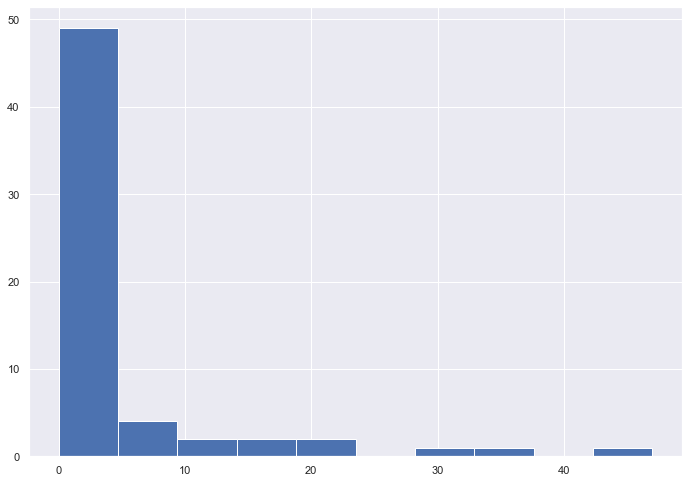

In [11]:
df_user_final[df_user_final['Flg_Creacion'].isnull()]["in_degree_followers"].hist()

In [12]:
#Al ser la mayoria de registros del tier 1, le asignamos por juicio de experto un flag de creacion de 1Y_3Y que acumula la mayyoria de registros de tier 1 y 2
df_user_final.loc[df_user_final['Flg_Creacion'].isnull(), 'Flg_Creacion'] = '1Y_3Y'
Validator.validar_categorico(df_user_final,['Flg_Creacion'])


,Variable,n,Missing,%Missing,Unico
0,Flg_Creacion,194147,0,0.0,6


In [13]:
Validator.validar_numerico(df_user_final,cols)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,194147,0,0.00,0,0.0,4,1.08,1.0,4.00,1.0,2.08,1.0,1.0,1.0,2.0,3.00,13612,7.01,2445,1.26,13612,7.01,2445,1.26,349,0.18
0,in_degree_followers,194147,112354,57.87,0,0.0,542,9.36,0.0,16840.00,5.0,471.77,1.0,2.0,8.0,18.0,103.08,10641,5.48,208,0.11,7487,3.86,3903,2.01,818,0.42
0,out_degree_followers,194147,112354,57.87,0,0.0,248,5.13,0.0,2756.00,8.5,64.96,2.0,4.0,11.0,20.0,54.00,10991,5.66,607,0.31,7967,4.10,3856,1.99,813,0.42
0,in_degree_cent_followers,194147,112354,57.87,0,0.0,542,0.00,0.0,0.07,0.0,0.00,0.0,0.0,0.0,0.0,0.00,12533,6.46,208,0.11,7487,3.86,3903,2.01,818,0.42
0,pagerank_cent_followers,194147,112354,57.87,0,0.0,28185,0.00,0.0,0.04,0.0,0.00,0.0,0.0,0.0,0.0,0.00,9554,4.92,173,0.09,8180,4.21,4090,2.11,818,0.42
0,degree_teams,194147,155035,79.85,0,0.0,70,3.33,1.0,133.00,8.5,16.57,2.0,4.0,6.0,10.0,23.00,2392,1.23,701,0.36,3841,1.98,1634,0.84,361,0.19
0,degree_cent_teams,194147,155035,79.85,0,0.0,70,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,2392,1.23,701,0.36,3841,1.98,1634,0.84,361,0.19
0,eigenvector_cent_teams,194147,155035,79.85,0,0.0,5732,0.00,0.0,0.23,0.0,0.02,0.0,0.0,0.0,0.0,0.00,9144,4.71,44,0.02,3912,2.01,1956,1.01,392,0.20
0,degree_forums,194147,92863,47.83,0,0.0,1619,85.04,2.0,15622.00,200.0,733.41,30.0,86.0,189.0,282.0,920.17,8761,4.51,1498,0.77,10088,5.20,5061,2.61,1013,0.52
0,degree_cent_forums,194147,92863,47.83,0,0.0,1619,0.00,0.0,0.15,0.0,0.01,0.0,0.0,0.0,0.0,0.01,9006,4.64,1498,0.77,10088,5.20,5061,2.61,1013,0.52


In [14]:
df_user_final_2 = df_user_final.copy()

In [15]:
# Primero crearemos unos flag para saber si un usuario esta o no en la red
df_user_final_2["Flg_IsIn_Followers_Net"] = np.where(df_user_final_2["in_degree_followers"].isnull(),0,1)
df_user_final_2["Flg_IsIn_Teams_Net"] = np.where(df_user_final_2["degree_teams"].isnull(),0,1)
df_user_final_2["Flg_IsIn_Forums_Net"] = np.where(df_user_final_2["degree_forums"].isnull(),0,1)
df_user_final_2.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net
0,368,antgoldbloom,Anthony Goldbloom,2,9Y,983.0,6.0,0.003872,0.001775,4.0,0.000026,5.427340e-23,887.0,0.008758,0.001207,0.0,0.0,0.0,0.0,3.0,13.0,14.0,13.0,139.0,1.0,3.0,6.0,1,1,1
1,381,iguyon,Isabelle,2,9Y,6.0,0.0,0.000024,0.000005,NaN,NaN,NaN,113.0,0.001116,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0,1,0,1
2,389,anandjeyahar,Anand Jeyahar,1,9Y,2.0,0.0,0.000008,0.000002,1.0,0.000006,5.427340e-23,59.0,0.000583,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1
3,392,jmeynet,Julien Meynet,3,9Y,1.0,0.0,0.000004,0.000002,NaN,NaN,NaN,25.0,0.000247,0.000001,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1,0,1
4,394,m4xl1n,m4xl1n,1,9Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [16]:
#Reemplazaremos valores NA por 0 para los usuarios que no estan en cada una de las reds
df_user_final_2.fillna(0,inplace=True)
df_user_final_2.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net
0,368,antgoldbloom,Anthony Goldbloom,2,9Y,983.0,6.0,0.003872,0.001775,4.0,0.000026,5.427340e-23,887.0,0.008758,0.001207,0.0,0.0,0.0,0.0,3.0,13.0,14.0,13.0,139.0,1.0,3.0,6.0,1,1,1
1,381,iguyon,Isabelle,2,9Y,6.0,0.0,0.000024,0.000005,0.0,0.000000,0.000000e+00,113.0,0.001116,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0,1,0,1
2,389,anandjeyahar,Anand Jeyahar,1,9Y,2.0,0.0,0.000008,0.000002,1.0,0.000006,5.427340e-23,59.0,0.000583,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1
3,392,jmeynet,Julien Meynet,3,9Y,1.0,0.0,0.000004,0.000002,0.0,0.000000,0.000000e+00,25.0,0.000247,0.000001,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1,0,1
4,394,m4xl1n,m4xl1n,1,9Y,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [17]:
df_user_final_2.isnull().sum()

UserId                      0
UserName                    0
DisplayName                 0
PerformanceTier             0
Flg_Creacion                0
in_degree_followers         0
out_degree_followers        0
in_degree_cent_followers    0
pagerank_cent_followers     0
degree_teams                0
degree_cent_teams           0
eigenvector_cent_teams      0
degree_forums               0
degree_cent_forums          0
eigenvector_cent_forums     0
TotalGold_Comp              0
TotalSilver_Comp            0
TotalBronze_Comp            0
TotalGold_Scri              0
TotalSilver_Scri            0
TotalBronze_Scri            0
TotalGold_Disc              0
TotalSilver_Disc            0
TotalBronze_Disc            0
TotalGold_Data              0
TotalSilver_Data            0
TotalBronze_Data            0
Flg_IsIn_Followers_Net      0
Flg_IsIn_Teams_Net          0
Flg_IsIn_Forums_Net         0
dtype: int64

# Correlacion

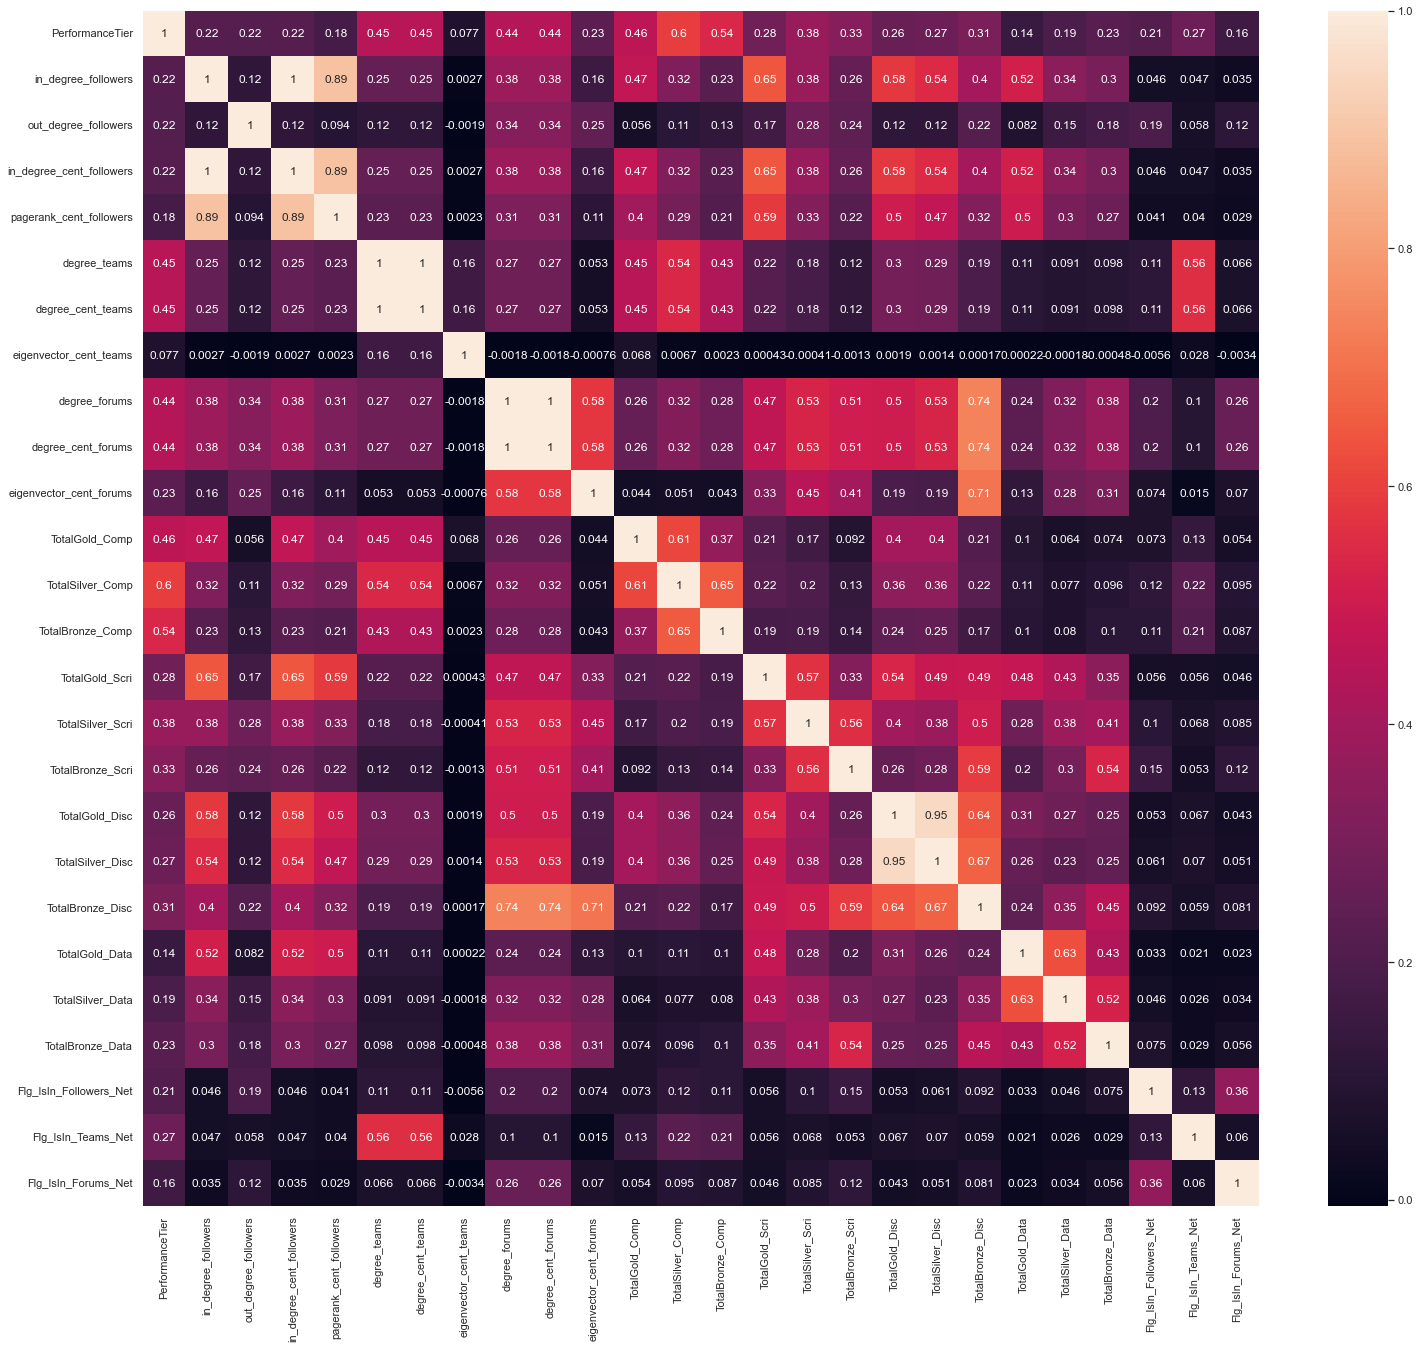

In [18]:
corrMatrix = df_user_final_2.corr()
plt.figure(figsize=[25,22])
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [19]:
#por_eliminar = ["in_degree_followers","out_degree_followers","in_degree_cent_followers",
#                "degree_teams","degree_cent_teams",
#                "degree_forums","degree_cent_forums"]
#for c in por_eliminar:
#    df_user_final_2.drop(columns=c,inplace=True)

In [20]:
#corrMatrix = df_user_final_2.corr()
#plt.figure(figsize=[20,17])
#sns.heatmap(corrMatrix, annot=True)
#plt.show()

# Revision de Outliers

In [21]:
df_user_final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194147 entries, 0 to 194146
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UserId                    194147 non-null  object 
 1   UserName                  194147 non-null  object 
 2   DisplayName               194147 non-null  object 
 3   PerformanceTier           194147 non-null  int64  
 4   Flg_Creacion              194147 non-null  object 
 5   in_degree_followers       194147 non-null  float64
 6   out_degree_followers      194147 non-null  float64
 7   in_degree_cent_followers  194147 non-null  float64
 8   pagerank_cent_followers   194147 non-null  float64
 9   degree_teams              194147 non-null  float64
 10  degree_cent_teams         194147 non-null  float64
 11  eigenvector_cent_teams    194147 non-null  float64
 12  degree_forums             194147 non-null  float64
 13  degree_cent_forums        194147 non-null  f

In [22]:
Validator.validar_numerico(df_user_final_2,df_user_final_2.columns[5:])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,in_degree_followers,194147,0,0.0,0,0.0,542,3.94,0.0,16840.00,2.5,304.40,0.0,1.0,3.0,6.0,40.00,20089,10.35,314,0.16,15315,7.89,9275,4.78,1922,0.99
0,out_degree_followers,194147,0,0.0,0,0.0,248,2.16,0.0,2756.00,2.5,41.73,0.0,1.0,5.0,10.0,33.00,30804,15.87,1287,0.66,16665,8.58,8799,4.53,1857,0.96
0,in_degree_cent_followers,194147,0,0.0,0,0.0,542,0.00,0.0,0.07,0.0,0.00,0.0,0.0,0.0,0.0,0.00,20089,10.35,314,0.16,15315,7.89,10641,5.48,1922,0.99
0,pagerank_cent_followers,194147,0,0.0,0,0.0,28186,0.00,0.0,0.04,0.0,0.00,0.0,0.0,0.0,0.0,0.00,21066,10.85,271,0.14,19198,9.89,9708,5.00,1942,1.00
0,degree_teams,194147,0,0.0,0,0.0,71,0.67,0.0,133.00,0.0,7.84,0.0,0.0,2.0,4.0,10.00,39112,20.15,3008,1.55,16727,8.62,6859,3.53,1634,0.84
0,degree_cent_teams,194147,0,0.0,0,0.0,71,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,39112,20.15,3008,1.55,16727,8.62,6859,3.53,1634,0.84
0,eigenvector_cent_teams,194147,0,0.0,0,0.0,5733,0.00,0.0,0.23,0.0,0.01,0.0,0.0,0.0,0.0,0.00,39112,20.15,45,0.02,11691,6.02,9224,4.75,1942,1.00
0,degree_forums,194147,0,0.0,0,0.0,1620,44.37,0.0,15622.00,82.5,529.70,2.0,33.0,114.0,195.0,602.00,26265,13.53,2286,1.18,19394,9.99,9525,4.91,1939,1.00
0,degree_cent_forums,194147,0,0.0,0,0.0,1620,0.00,0.0,0.15,0.0,0.01,0.0,0.0,0.0,0.0,0.01,26265,13.53,2286,1.18,19394,9.99,9725,5.01,1939,1.00
0,eigenvector_cent_forums,194147,0,0.0,0,0.0,63809,0.00,0.0,0.38,0.0,0.01,0.0,0.0,0.0,0.0,0.00,30587,15.75,735,0.38,19408,10.00,9708,5.00,1942,1.00


## Metricas del grafo

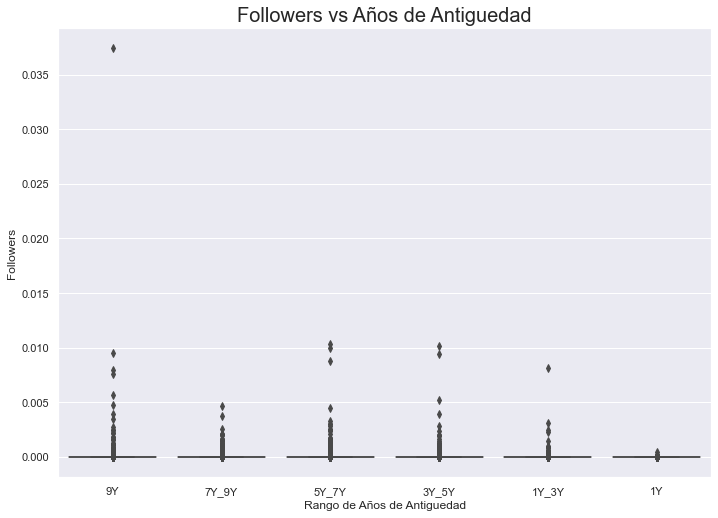

In [23]:
sns.boxplot(data=df_user_final_2,x="Flg_Creacion",y="pagerank_cent_followers")
plt.title("Followers vs Años de Antiguedad",size=20)
plt.xlabel("Rango de Años de Antiguedad",size=12)
plt.ylabel("Followers",size=12)
plt.show()

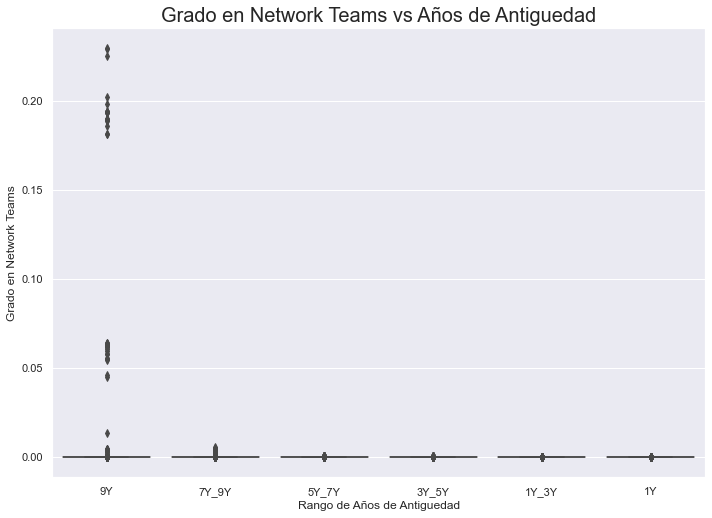

In [24]:
sns.boxplot(data=df_user_final_2,x="Flg_Creacion",y="eigenvector_cent_teams")
plt.title("Grado en Network Teams vs Años de Antiguedad",size=20)
plt.xlabel("Rango de Años de Antiguedad",size=12)
plt.ylabel("Grado en Network Teams",size=12)
plt.show()

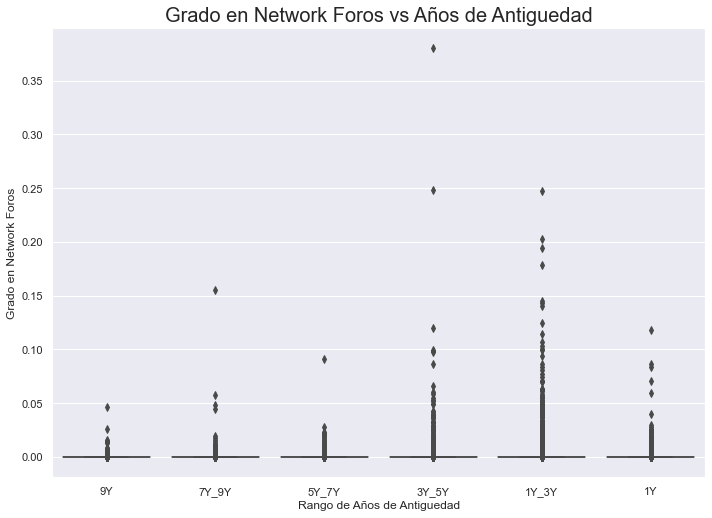

In [25]:
sns.boxplot(data=df_user_final_2,x="Flg_Creacion",y="eigenvector_cent_forums")
plt.title("Grado en Network Foros vs Años de Antiguedad",size=20)
plt.xlabel("Rango de Años de Antiguedad",size=12)
plt.ylabel("Grado en Network Foros",size=12)
plt.show()

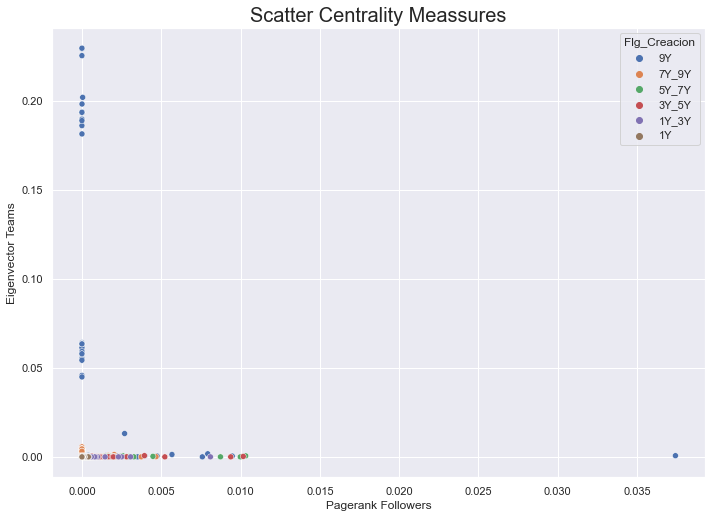

In [26]:
sns.scatterplot(data=df_user_final_2,x="pagerank_cent_followers",y="eigenvector_cent_teams",hue="Flg_Creacion")
plt.title("Scatter Centrality Meassures",size=20)
plt.xlabel("Pagerank Followers",size=12)
plt.ylabel("Eigenvector Teams",size=12)
plt.show()

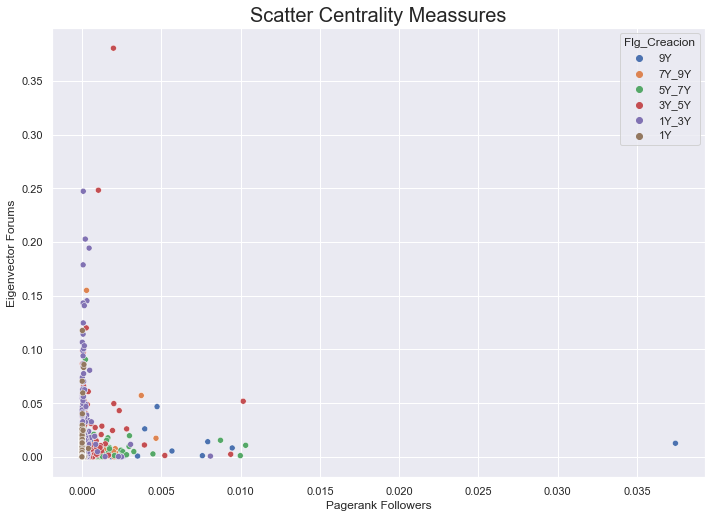

In [27]:
sns.scatterplot(data=df_user_final_2,x="pagerank_cent_followers",y="eigenvector_cent_forums",hue="Flg_Creacion")
plt.title("Scatter Centrality Meassures",size=20)
plt.xlabel("Pagerank Followers",size=12)
plt.ylabel("Eigenvector Forums",size=12)
plt.show()

In [28]:
df_user_final_3 = df_user_final_2.copy()

In [29]:
columns = df_user_final_3.columns[5:]
for col in columns:
    media = df_user_final_3[col].mean()
    std = df_user_final_3[col].std()
    _3SDMAX = media+3*std
    #Obtenemos array de los outliers por chevishev
    flg_outlier = np.where((df_user_final_3[col]> _3SDMAX),True,False)
    #Cambiamos los outliers por el max 3SD
    df_user_final_3.loc[flg_outlier,col] = _3SDMAX

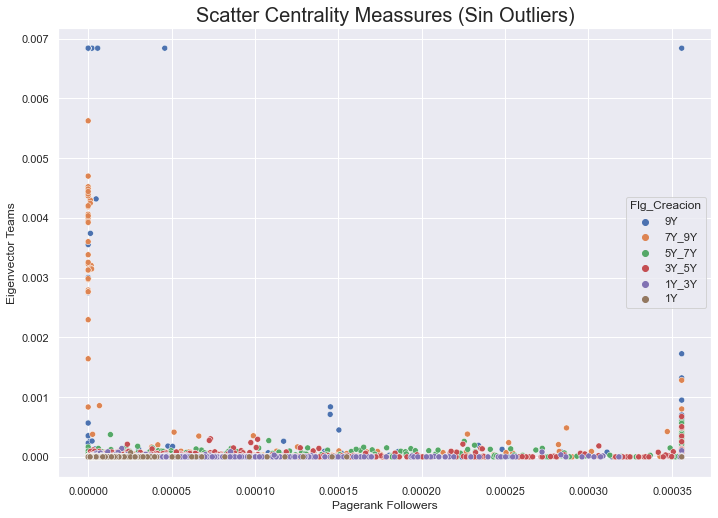

In [30]:
sns.scatterplot(data=df_user_final_3,x="pagerank_cent_followers",y="eigenvector_cent_teams",hue="Flg_Creacion")
plt.title("Scatter Centrality Meassures (Sin Outliers)",size=20)
plt.xlabel("Pagerank Followers",size=12)
plt.ylabel("Eigenvector Teams",size=12)
plt.show()

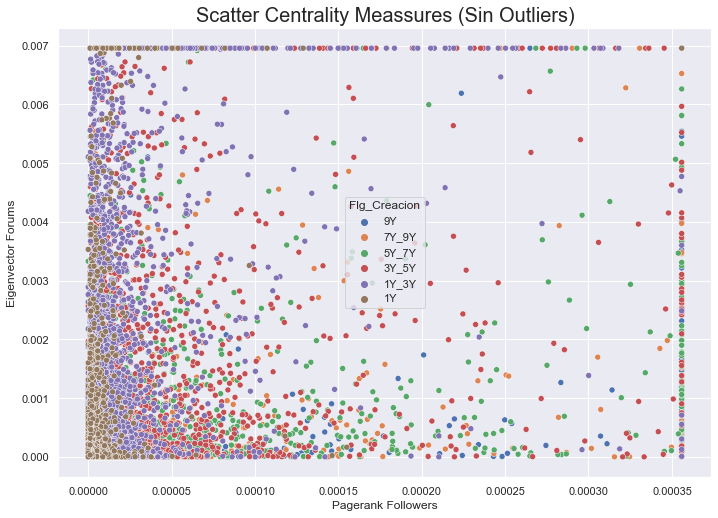

In [31]:
sns.scatterplot(data=df_user_final_3,x="pagerank_cent_followers",y="eigenvector_cent_forums",hue="Flg_Creacion")
plt.title("Scatter Centrality Meassures (Sin Outliers)",size=20)
plt.xlabel("Pagerank Followers",size=12)
plt.ylabel("Eigenvector Forums",size=12)
plt.show()

In [32]:
df_user_final[df_user_final["UserName"]=="msla43883"].head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data
8185,43883,msla43883,msla,3,9Y,NaN,NaN,NaN,NaN,43.0,0.000276,0.225428,23.0,0.000227,0.000002,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0


In [33]:
df_team_memberships_graph_3 = pd.read_csv(r"../data/processed/Graph_Teams.csv",dtype=str)
df_team_memberships_graph_3["weight"] = df_team_memberships_graph_3["weight"].astype(float)
df_team_memberships_graph_3.sort_values("weight",ascending=False)

,UserId_1,UserId_2,weight
240,100236,189197,30.0
128488,448347,1270655,28.0
49696,2029256,2711607,28.0
7027,111640,210078,28.0
66518,24266,29346,25.0
...,...,...,...
79947,2790060,2579298,0.0
79948,2790149,3245102,0.0
79949,2790149,3657417,0.0
79950,2790149,4226133,0.0


In [34]:
df_team_memberships_graph_3[(df_team_memberships_graph_3["UserId_1"]=="43883") | (df_team_memberships_graph_3["UserId_2"]=="43883")].head(10)

,UserId_1,UserId_2,weight
3697,105017,43883,3.0
97129,33583,43883,2.0
122689,42831,43883,5.0
122715,42832,43883,5.0
125717,43882,43883,8.0
125746,43883,105017,3.0
125747,43883,33495,5.0
125748,43883,33582,5.0
125749,43883,33583,3.0
125750,43883,33968,5.0


In [35]:
df_team_memberships = pd.read_csv(r"../data/interim/TeamMemberships.csv",dtype=str)
df_team_memberships.head()

,TeamId,UserId
0,518,635
1,526,839
2,527,816
3,528,778
4,529,747


In [36]:
df_team_memberships[df_team_memberships["UserId"]=="637722"]

,TeamId,UserId
3002262,4787211,637722
3286415,5461165,637722
3436988,5001707,637722
3441992,5001702,637722
3457409,5370306,637722
...,...,...
5247743,8116559,637722
5297163,7950360,637722
5340075,8165917,637722
5350555,8091716,637722


In [37]:
df_team_memberships.groupby("UserId").count().reset_index().sort_values("TeamId",ascending=False)

,UserId,TeamId
1218572,5030586,1695
1891370,929585,994
785178,3258,553
358112,18463,532
1964455,993,487
...,...,...
881654,3626607,1
881653,3626605,1
881650,3626599,1
881648,3626596,1


# Escalamiento + Dummies

In [38]:
# Seleccionamos las columnas a escalar
df_user_final_3.columns[3:]

Index(['PerformanceTier', 'Flg_Creacion', 'in_degree_followers',
       'out_degree_followers', 'in_degree_cent_followers',
       'pagerank_cent_followers', 'degree_teams', 'degree_cent_teams',
       'eigenvector_cent_teams', 'degree_forums', 'degree_cent_forums',
       'eigenvector_cent_forums', 'TotalGold_Comp', 'TotalSilver_Comp',
       'TotalBronze_Comp', 'TotalGold_Scri', 'TotalSilver_Scri',
       'TotalBronze_Scri', 'TotalGold_Disc', 'TotalSilver_Disc',
       'TotalBronze_Disc', 'TotalGold_Data', 'TotalSilver_Data',
       'TotalBronze_Data', 'Flg_IsIn_Followers_Net', 'Flg_IsIn_Teams_Net',
       'Flg_IsIn_Forums_Net'],
      dtype='object')

In [39]:
#Lista de variables categoricas
cols_cat = ['Flg_Creacion','Flg_IsIn_Followers_Net','Flg_IsIn_Teams_Net','Flg_IsIn_Forums_Net']

#Lista de variables numericas
cols_num = df_user_final_3.columns[3:].tolist()
for cat in cols_cat:
    cols_num.remove(cat)

print("# Variables categoricas: ",len(cols_cat))
print("# Variables numericas: ",len(cols_num))


# Variables categoricas:  4
# Variables numericas:  23


In [40]:

Validator.validar_numerico(df_user_final_3,df_user_final_3.columns[5:])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,in_degree_followers,194147,0,0.0,0,0.0,272,2.30,0.0,304.40,2.5,50.99,0.0,1.0,3.0,6.0,40.00,20089,10.35,1569,0.81,15315,7.89,9275,4.78,1922,0.99
0,out_degree_followers,194147,0,0.0,0,0.0,43,1.83,0.0,41.73,2.5,17.86,0.0,1.0,5.0,10.0,33.00,30804,15.87,4742,2.44,16665,8.58,8799,4.53,1857,0.96
0,in_degree_cent_followers,194147,0,0.0,0,0.0,272,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,20089,10.35,1569,0.81,15315,7.89,10641,5.48,1922,0.99
0,pagerank_cent_followers,194147,0,0.0,0,0.0,27916,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,21066,10.85,1367,0.70,19198,9.89,9708,5.00,1942,1.00
0,degree_teams,194147,0,0.0,0,0.0,9,0.57,0.0,7.84,0.0,4.97,0.0,0.0,2.0,4.0,7.84,39112,20.15,6859,3.53,16727,8.62,6859,3.53,0,0.00
0,degree_cent_teams,194147,0,0.0,0,0.0,9,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,39112,20.15,6859,3.53,16727,8.62,6859,3.53,0,0.00
0,eigenvector_cent_teams,194147,0,0.0,0,0.0,5701,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.00,39112,20.15,130,0.07,11691,6.02,9224,4.75,1942,1.00
0,degree_forums,194147,0,0.0,0,0.0,530,37.43,0.0,529.70,82.5,290.83,2.0,33.0,114.0,195.0,529.70,26265,13.53,4886,2.52,19394,9.99,9525,4.91,0,0.00
0,degree_cent_forums,194147,0,0.0,0,0.0,530,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.01,26265,13.53,4886,2.52,19394,9.99,9725,5.01,0,0.00
0,eigenvector_cent_forums,194147,0,0.0,0,0.0,63075,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.00,30587,15.75,2432,1.25,19408,10.00,9708,5.00,1942,1.00


In [41]:
#Creamos una copia para no perder los datos
df_user_final_4 = df_user_final_3.copy()
df_user_final_4.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net
0,368,antgoldbloom,Anthony Goldbloom,2,9Y,304.398244,6.0,0.001199,0.000356,4.0,0.000026,5.427340e-23,529.696601,0.005230,0.001207,0.0,0.000000,0.0,0.0,1.817693,5.205004,6.767892,8.125636,99.141329,0.293463,0.511492,1.943553,1.0,1.0,1.0
1,381,iguyon,Isabelle,2,9Y,6.000000,0.0,0.000024,0.000005,0.0,0.000000,0.000000e+00,113.000000,0.001116,0.000052,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,53.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0
2,389,anandjeyahar,Anand Jeyahar,1,9Y,2.000000,0.0,0.000008,0.000002,1.0,0.000006,5.427340e-23,59.000000,0.000583,0.000033,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0
3,392,jmeynet,Julien Meynet,3,9Y,1.000000,0.0,0.000004,0.000002,0.0,0.000000,0.000000e+00,25.000000,0.000247,0.000001,1.0,2.589986,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0
4,394,m4xl1n,m4xl1n,1,9Y,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [42]:
#Escalamos la data numerica entre 0-1
scaler = MinMaxScaler()
df_user_final_4[cols_num] = scaler.fit_transform(df_user_final_4[cols_num])
df_user_final_4.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net
0,368,antgoldbloom,Anthony Goldbloom,0.333333,9Y,1.000000,0.143779,1.000000,1.000000,0.510318,0.510318,7.935216e-21,1.000000,1.000000,0.173579,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
1,381,iguyon,Isabelle,0.333333,9Y,0.019711,0.000000,0.019711,0.012926,0.000000,0.000000,0.000000e+00,0.213330,0.213330,0.007540,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.123067,0.534590,0.0,0.0,0.0,1.0,0.0,1.0
2,389,anandjeyahar,Anand Jeyahar,0.000000,9Y,0.006570,0.000000,0.006570,0.004479,0.127579,0.127579,7.935216e-21,0.111385,0.111385,0.004787,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010087,0.0,0.0,0.0,1.0,1.0,1.0
3,392,jmeynet,Julien Meynet,0.666667,9Y,0.003285,0.000000,0.003285,0.006241,0.000000,0.000000,0.000000e+00,0.047197,0.047197,0.000177,0.731685,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020173,0.0,0.0,0.0,1.0,0.0,1.0
4,394,m4xl1n,m4xl1n,0.000000,9Y,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.731685,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#Validamos si se escalo correctamente
Validator.validar_numerico(df_user_final_4,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,194147,0,0.0,0,0.0,4,0.03,0.0,1.0,0.00,0.36,0.0,0.00,0.00,0.33,0.67,13612,7.01,2445,1.26,13612,7.01,2445,1.26,349,0.18
0,in_degree_followers,194147,0,0.0,0,0.0,272,0.01,0.0,1.0,0.01,0.17,0.0,0.00,0.01,0.02,0.13,20089,10.35,1569,0.81,15315,7.89,9275,4.78,1922,0.99
0,out_degree_followers,194147,0,0.0,0,0.0,43,0.04,0.0,1.0,0.06,0.43,0.0,0.02,0.12,0.24,0.79,30804,15.87,4742,2.44,16665,8.58,8799,4.53,1857,0.96
0,in_degree_cent_followers,194147,0,0.0,0,0.0,272,0.01,0.0,1.0,0.01,0.17,0.0,0.00,0.01,0.02,0.13,20089,10.35,1569,0.81,15315,7.89,9275,4.78,1922,0.99
0,pagerank_cent_followers,194147,0,0.0,0,0.0,27907,0.01,0.0,1.0,0.01,0.16,0.0,0.00,0.01,0.02,0.11,21066,10.85,1367,0.70,19198,9.89,9708,5.00,1942,1.00
0,degree_teams,194147,0,0.0,0,0.0,9,0.07,0.0,1.0,0.00,0.63,0.0,0.00,0.26,0.51,1.00,39112,20.15,6859,3.53,16727,8.62,6859,3.53,3008,1.55
0,degree_cent_teams,194147,0,0.0,0,0.0,9,0.07,0.0,1.0,0.00,0.63,0.0,0.00,0.26,0.51,1.00,39112,20.15,6859,3.53,16727,8.62,6859,3.53,0,0.00
0,eigenvector_cent_teams,194147,0,0.0,0,0.0,5701,0.00,0.0,1.0,0.00,0.05,0.0,0.00,0.00,0.00,0.00,39112,20.15,130,0.07,11691,6.02,9224,4.75,1942,1.00
0,degree_forums,194147,0,0.0,0,0.0,530,0.07,0.0,1.0,0.16,0.55,0.0,0.06,0.22,0.37,1.00,26265,13.53,4886,2.52,19394,9.99,9525,4.91,0,0.00
0,degree_cent_forums,194147,0,0.0,0,0.0,530,0.07,0.0,1.0,0.16,0.55,0.0,0.06,0.22,0.37,1.00,26265,13.53,4886,2.52,19394,9.99,9525,4.91,0,0.00


In [44]:
#Obtenemos los valores dummies para nuestras variables categoricas
df_dummies = pd.get_dummies(df_user_final_4[cols_cat])
df_dummies.head()

,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Flg_Creacion_1Y,Flg_Creacion_1Y_3Y,Flg_Creacion_3Y_5Y,Flg_Creacion_5Y_7Y,Flg_Creacion_7Y_9Y,Flg_Creacion_9Y
0,1.0,1.0,1.0,0,0,0,0,0,1
1,1.0,0.0,1.0,0,0,0,0,0,1
2,1.0,1.0,1.0,0,0,0,0,0,1
3,1.0,0.0,1.0,0,0,0,0,0,1
4,0.0,0.0,0.0,0,0,0,0,0,1


In [45]:
#Borramos las columnas categoricas
df_user_final_4.drop(columns=cols_cat,inplace=True)
#Agregamos las nuevas columnas dummies
df_user_final_5 = df_user_final_4.join(df_dummies)
df_user_final_5.head()

,UserId,UserName,DisplayName,PerformanceTier,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Flg_Creacion_1Y,Flg_Creacion_1Y_3Y,Flg_Creacion_3Y_5Y,Flg_Creacion_5Y_7Y,Flg_Creacion_7Y_9Y,Flg_Creacion_9Y
0,368,antgoldbloom,Anthony Goldbloom,0.333333,1.000000,0.143779,1.000000,1.000000,0.510318,0.510318,7.935216e-21,1.000000,1.000000,0.173579,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1
1,381,iguyon,Isabelle,0.333333,0.019711,0.000000,0.019711,0.012926,0.000000,0.000000,0.000000e+00,0.213330,0.213330,0.007540,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.123067,0.534590,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
2,389,anandjeyahar,Anand Jeyahar,0.000000,0.006570,0.000000,0.006570,0.004479,0.127579,0.127579,7.935216e-21,0.111385,0.111385,0.004787,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010087,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,0,1
3,392,jmeynet,Julien Meynet,0.666667,0.003285,0.000000,0.003285,0.006241,0.000000,0.000000,0.000000e+00,0.047197,0.047197,0.000177,0.731685,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020173,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
4,394,m4xl1n,m4xl1n,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.731685,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1


In [46]:
df_user_final.to_csv(r"../data/processed/UserPreProcessed.csv",index=False)
df_user_final_5.to_csv(r"../data/processed/UserProcessed.csv",index=False)